In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from datetime import datetime


In [ ]:
# TBC duomenys
# https://data.gov.lt/datasets/2871/

# (tuberkulioze – rūkymas, gėrimas,
# lytis, TLK kodas, mirties data)

# Ar yra priklausomybė tarp gyvenimo
# trukmės ir TBC žalingų įpročių? Pateikite TBC sergančiųjų
# duomenų apžvalgą: pasiskirstymas pagal lytį, amžių,
# rūkymo/alkoholio vart. stažą. Parašykite skriptą, kuris
# prognozuotų tikėtiną paciento gyvenimo trukmę.


In [ ]:
tubdf = pd.read_csv('../../../eismas/TubPacientoZalingasIprotis.csv')
tubdf.head(2)

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d
0,datasets/gov/santara/tub_pacientu_zalingi_ipro...,da2bbb1c-2884-48bc-bdfd-19b27ff97025,76cab5cc-7551-4c30-8df1-537f5c036a5a,NaN,000254ba808ae65,7a0f681b673018a,2a925dd8f6a43f2,cf71c293a267455,2e0500a37929dcc,Tinkamas,...,2.0,11-20 cigarečių per dieną,3.0,11 - 20 metų,1.0,Nevartoja,A15d,A15d,NaN,NaN
1,datasets/gov/santara/tub_pacientu_zalingi_ipro...,eb2639f9-29b6-4d6c-888b-5eb2506dbb19,c3d871f4-5b93-4d88-aaae-0a6e9fe7daf3,NaN,0002a198424b859,d69d675af2a2fef,743a21b9b51c547,565e6a3a976e20a,aa6024f3d69f070,Tinkamas,...,4.0,Nerūko,0.0,NaN,2.0,Vartoja retai,A19.1,A19.1,NaN,NaN


In [25]:
tubmir = tubdf[tubdf['mirties_nuo_tub_d'].notnull()]
tubmir.head(2)

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d
5,datasets/gov/santara/tub_pacientu_zalingi_ipro...,cb0f7822-8519-40bb-96a7-c7d405a1f78a,09802fd8-acfc-48fb-bed3-3e6743179d47,NaN,0005809b95c1312,9eb1b54d0957f7e,a291729a59db924,b043d19ee0427c5,802e6bf941f88d3,Tinkamas,...,4.0,Nerūko,NaN,NaN,2.0,Vartoja retai,A15,A15,True,2003-05-01
7,datasets/gov/santara/tub_pacientu_zalingi_ipro...,afb99b2d-2562-474b-b6aa-08410aa9b5be,4f08bce0-5c5b-40b6-94fe-ffe942ddeedd,NaN,00068dce2ac554f,e4819b392857f91,6a9d7217f22be0a,b73343f89dadc3a,e721deb0b137a2a,Tinkamas,...,2.0,11-20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A16d;A15.1d,A15.1d,False,2007-01-28


In [4]:
tubmir.columns

Index(['_type', '_id', '_revision', '_page.next', 'paciento_id',
       'paciento_vardas', 'paciento_pavarde', 'paciento_gim_data',
       'paciento_asmens_kodas', 'vda_ak_validacija',
       'vda_paciento_gim_metai_ak', 'paciento_gim_metai',
       'vda_paciento_lytis_ak', 'paciento_lytis', 'rukymas_id',
       'rukymas_reiksme', 'rukymo_stazas_id', 'rukymo_stazas_reiksme',
       'alkoholis_id', 'alkoholis_reiksme', 'vda_ligos_kodai', 'ligos_kodas',
       'ar_mire_nuo_tub', 'mirties_nuo_tub_d'],
      dtype='object')

In [26]:
# Convert to datetime format
tubmir['paciento_gim_metai'] = pd.to_datetime(tubmir['paciento_gim_metai'])
tubmir['mirties_nuo_tub_d'] = pd.to_datetime(tubmir['mirties_nuo_tub_d'])

In [27]:
tubmir['amzius'] = tubmir['mirties_nuo_tub_d'].dt.year - tubmir['paciento_gim_metai'].dt.year
tubmir.head(2)

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,amzius
5,datasets/gov/santara/tub_pacientu_zalingi_ipro...,cb0f7822-8519-40bb-96a7-c7d405a1f78a,09802fd8-acfc-48fb-bed3-3e6743179d47,NaN,0005809b95c1312,9eb1b54d0957f7e,a291729a59db924,b043d19ee0427c5,802e6bf941f88d3,Tinkamas,...,Nerūko,NaN,NaN,2.0,Vartoja retai,A15,A15,True,2003-05-01,79
7,datasets/gov/santara/tub_pacientu_zalingi_ipro...,afb99b2d-2562-474b-b6aa-08410aa9b5be,4f08bce0-5c5b-40b6-94fe-ffe942ddeedd,NaN,00068dce2ac554f,e4819b392857f91,6a9d7217f22be0a,b73343f89dadc3a,e721deb0b137a2a,Tinkamas,...,11-20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A16d;A15.1d,A15.1d,False,2007-01-28,56


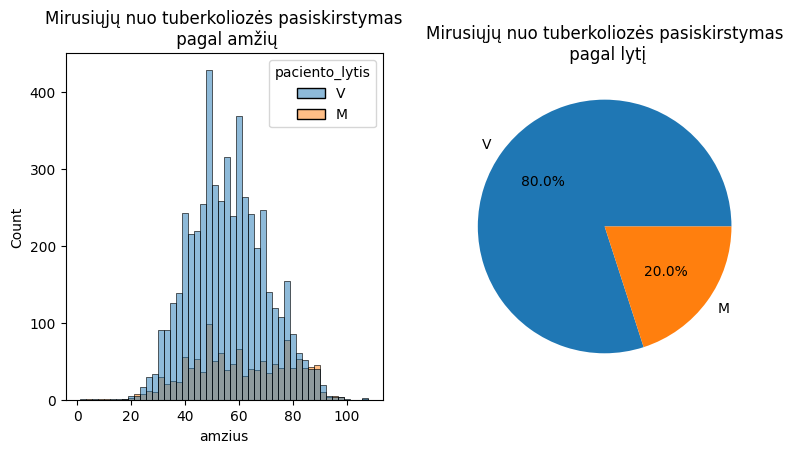

In [28]:
lytis_mire = tubmir['paciento_lytis'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
sns.histplot(data=tubmir, x='amzius', hue='paciento_lytis', ax=ax1)
ax2.pie(lytis_mire.values, labels=lytis_mire.index, autopct='%1.1f%%')
ax1.set_title('Mirusiųjų nuo tuberkoliozės pasiskirstymas\n pagal amžių')
ax2.set_title('Mirusiųjų nuo tuberkoliozės pasiskirstymas\n pagal lytį')
plt.show()

paciento_lytis
V    35769
M    16368
Name: count, dtype: int64


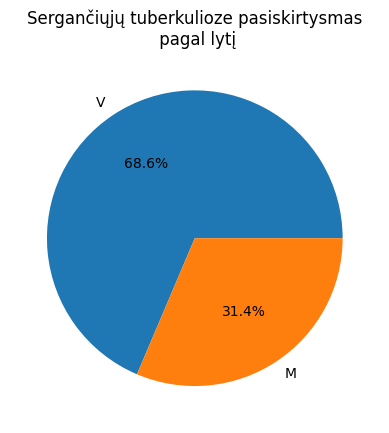

In [29]:
lytis_serga = tubdf['paciento_lytis'].value_counts()
print(lytis_serga)
plt.pie(lytis_serga.values, labels=lytis_serga.index, autopct='%1.1f%%' )
plt.title('Sergančiųjų tuberkulioze pasiskirtysmas\n pagal lytį')
plt.show()

In [30]:
data = {
    'Lytis': ['V', 'M'],
    'Visi': [lytis_serga['V'], lytis_serga['M']], # sergatys pacientai pgal lyti
    'Mire': [lytis_mire['V'], lytis_mire['M']]
}
lytisdf = pd.DataFrame(data)

# mirštamumo procentas
lytisdf['mir_proc'] = round(((lytisdf['Mire'] / lytisdf['Visi']) * 100), 2)
lytisdf.head()

,Lytis,Visi,Mire,mir_proc
0,V,35769,5141,14.37
1,M,16368,1287,7.86


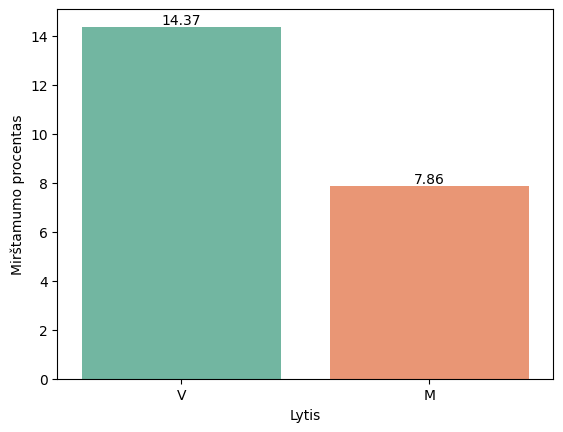

In [31]:
fig, ax = plt.subplots()
sns.barplot(x='Lytis', y='mir_proc', data=lytisdf, palette='Set2')
plt.ylabel('Mirštamumo procentas')
for i in ax.containers:
    ax.bar_label(i)
plt.show()
# Vyrų mirštamumas yra beveik du kartus didesnis nei moterų mirštamumas

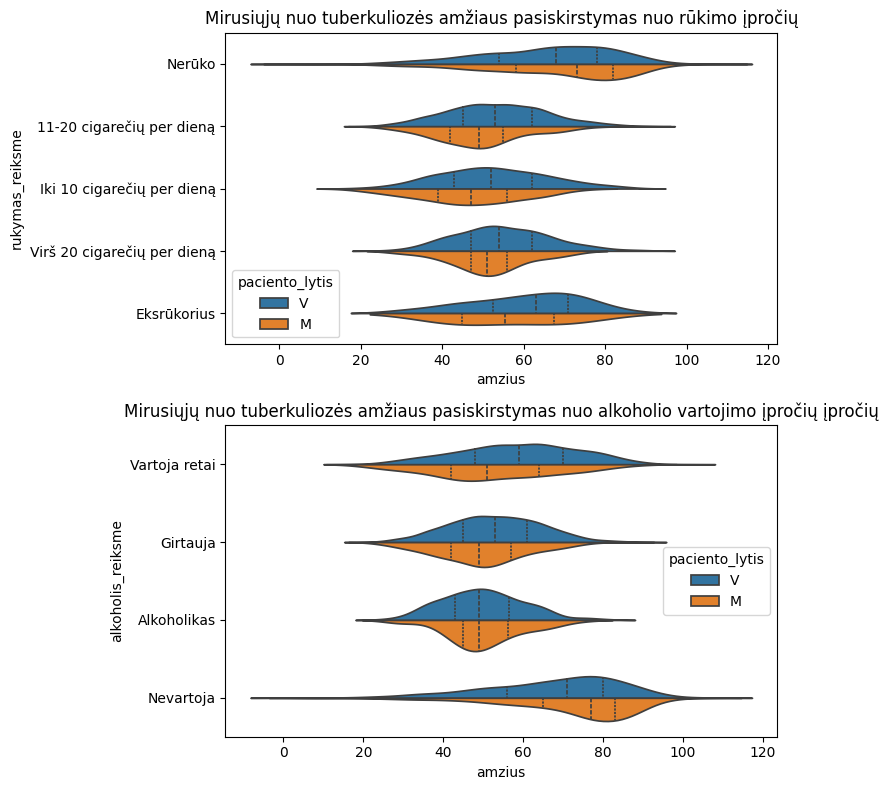

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.violinplot(data=tubmir, x='amzius', y='rukymas_reiksme', hue='paciento_lytis', split=True, inner="quart", ax=ax1)
sns.violinplot(data=tubmir, x='amzius', y='alkoholis_reiksme', hue='paciento_lytis', split=True, inner="quart", ax=ax2)
ax1.set_title('Mirusiųjų nuo tuberkuliozės amžiaus pasiskirstymas nuo rūkimo įpročių')
ax2.set_title('Mirusiųjų nuo tuberkuliozės amžiaus pasiskirstymas nuo alkoholio vartojimo įpročių įpročių')
plt.tight_layout()
plt.show()
# ax2.tick_params(axis='x', rotation=90)

# 1. Nerūkantys ir nevartojantys alkoholio vyrais ir moterys miršta vyreniame amžiuje. Moterys išgyvena ilgiau
# 2. Moterys sergančios tuberkulioze ir turinčios žalingų įpročių statiškai gali mirsti jaunesnio amžiaus nei vyrai turintys žalingų įpročių.

In [21]:
tubmir['rukymo_stazas_reiksme'].fillna('nerūko', inplace=True)
tubmir.head(2)

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,amzius
5,datasets/gov/santara/tub_pacientu_zalingi_ipro...,cb0f7822-8519-40bb-96a7-c7d405a1f78a,09802fd8-acfc-48fb-bed3-3e6743179d47,NaN,0005809b95c1312,9eb1b54d0957f7e,a291729a59db924,b043d19ee0427c5,802e6bf941f88d3,Tinkamas,...,Nerūko,NaN,nerūko,2.0,Vartoja retai,A15,A15,True,2003-05-01,79
7,datasets/gov/santara/tub_pacientu_zalingi_ipro...,afb99b2d-2562-474b-b6aa-08410aa9b5be,4f08bce0-5c5b-40b6-94fe-ffe942ddeedd,NaN,00068dce2ac554f,e4819b392857f91,6a9d7217f22be0a,b73343f89dadc3a,e721deb0b137a2a,Tinkamas,...,11-20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A16d;A15.1d,A15.1d,False,2007-01-28,56


In [23]:
tubmir.columns

Index(['_type', '_id', '_revision', '_page.next', 'paciento_id',
       'paciento_vardas', 'paciento_pavarde', 'paciento_gim_data',
       'paciento_asmens_kodas', 'vda_ak_validacija',
       'vda_paciento_gim_metai_ak', 'paciento_gim_metai',
       'vda_paciento_lytis_ak', 'paciento_lytis', 'rukymas_id',
       'rukymas_reiksme', 'rukymo_stazas_id', 'rukymo_stazas_reiksme',
       'alkoholis_id', 'alkoholis_reiksme', 'vda_ligos_kodai', 'ligos_kodas',
       'ar_mire_nuo_tub', 'mirties_nuo_tub_d', 'amzius'],
      dtype='object')

In [36]:
rukmir = tubmir.groupby(['rukymas_reiksme', 'rukymo_stazas_reiksme'])['paciento_id'].count().reset_index(name='kiekis')
alkmir = tubmir.groupby(['alkoholis_reiksme'])['paciento_id'].count().reset_index(name='kiekis')

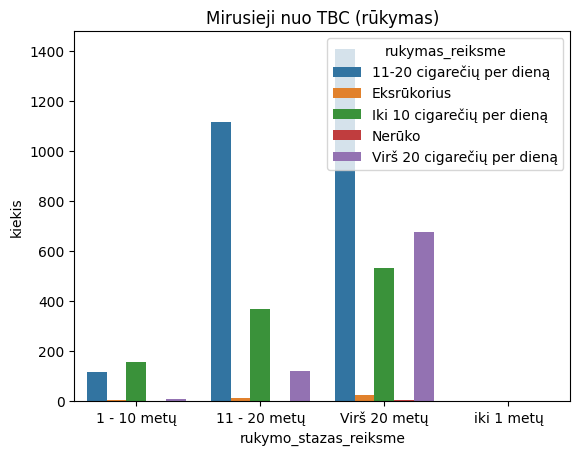

In [37]:
sns.barplot(data=rukmir, x='rukymo_stazas_reiksme', y='kiekis', hue='rukymas_reiksme')
plt.title('Mirusieji nuo TBC (rūkymas)')
plt.show()
# Matome, kad 1-10 metų rūkymo stažą turinčių žmonių  daugiausiai mirė nuo TBC rūkančių iki 20 cigarečių per dieną
# Žmonių turinčių 11-20 metų rūkimo stažą daugiausiai  mirė surūkiusių 11-20 cigarečių per dieną
# Turintys virš 20 metų  rūkymo stažą nusprendė, kad jiems papildomos žalos per daug nepadarys, tad smarkiai iššaugo skaičių žmonių, kurie mirė
# nuo TBC surukydami virš 20 cigarečių per dieną

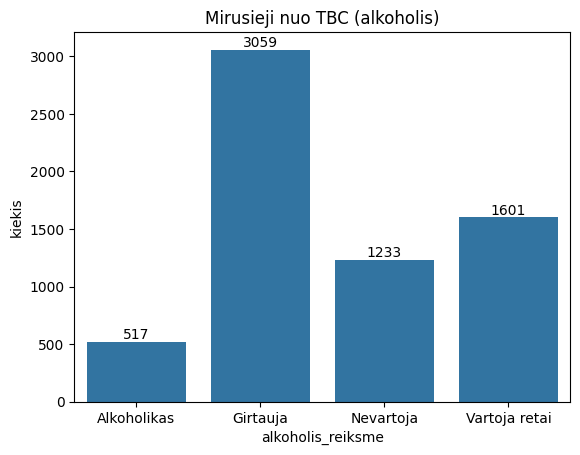

In [42]:
fig, ax = plt.subplots()
sns.barplot(data=alkmir, x='alkoholis_reiksme', y='kiekis')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Mirusieji nuo TBC (alkoholis)')
plt.show()
#  Daugiau nei pusė murusiųjų nuo TBC nevengdavo girtauti arba buvo alkoholikai

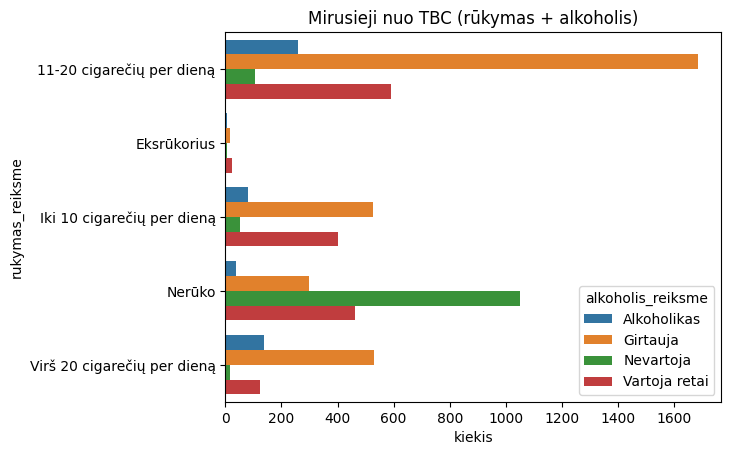

In [49]:
rukalk = tubmir.groupby(['rukymas_reiksme', 'alkoholis_reiksme'])['paciento_id'].count().reset_index(name='kiekis')

sns.barplot(data=rukalk, y='rukymas_reiksme', x='kiekis', hue='alkoholis_reiksme', orient='h')
plt.title('Mirusieji nuo TBC (rūkymas + alkoholis)')
plt.show()
# akivaizdu, kad rūkančių ir bent nuo 11 cigarečių per diena ir girtaujančiū, murusiųjų nuo TBC skaičius didesnis
#  stebina, kad nerūkančių ir nevartojančių alkoholio mirusiųju skaičius didelis

In [58]:
def set_amz_grupe(x):
    if x < 20:
        return 'iki 20'
    elif 20 <= x < 30:
        return '20-29'
    elif 30 <= x < 40:
        return '30-39'
    elif 40 <= x < 50:
        return '40-39'
    elif 50 <= x < 60:
        return '50-59'
    elif 60 <= x < 70:
        return '60-79'
    elif 70 <= x < 80:
        return '70-79'
    else:
        return '80 ir daugiau'

tubmir['amz_grupe'] = tubmir['amzius'].apply(set_amz_grupe)

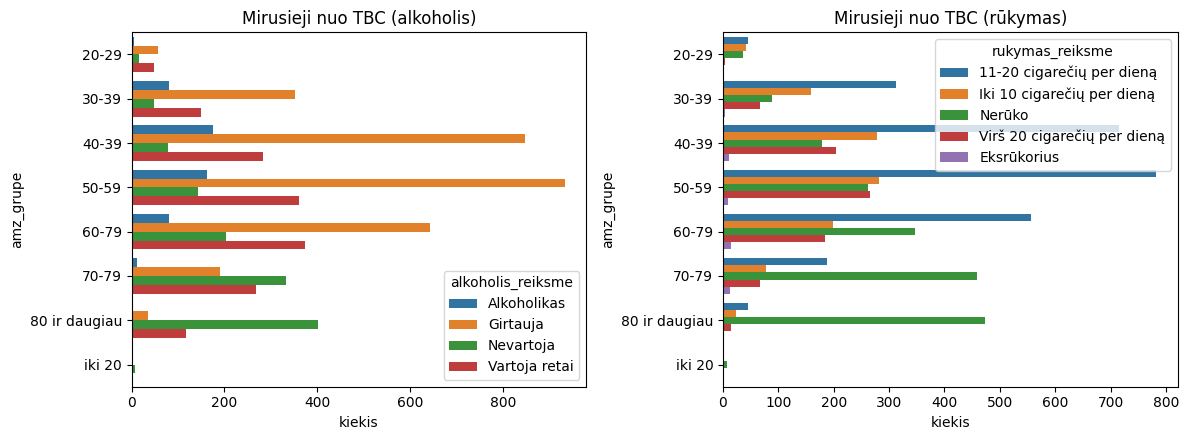

In [59]:
amzalk = tubmir.groupby(['amz_grupe', 'alkoholis_reiksme'])['paciento_id'].count().reset_index(name='kiekis')
amzruk = tubmir.groupby(['amz_grupe', 'rukymas_reiksme'])['paciento_id'].count().reset_index(name='kiekis')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 4.5])
sns.barplot(data=amzalk, y='amz_grupe', x='kiekis', hue='alkoholis_reiksme', orient='h', ax=ax1)
sns.barplot(data=amzruk, y='amz_grupe', x='kiekis', hue='rukymas_reiksme', orient='h', ax=ax2)
ax1.set_title('Mirusieji nuo TBC (alkoholis)')
ax2.set_title('Mirusieji nuo TBC (rūkymas)')
plt.tight_layout()
plt.show()
# Pastebime, kad sergantys TBC ir vartojantys alkoholį ir rūkantys miršta anksčiau

In [63]:
tubmir.columns

Index(['_type', '_id', '_revision', '_page.next', 'paciento_id',
       'paciento_vardas', 'paciento_pavarde', 'paciento_gim_data',
       'paciento_asmens_kodas', 'vda_ak_validacija',
       'vda_paciento_gim_metai_ak', 'paciento_gim_metai',
       'vda_paciento_lytis_ak', 'paciento_lytis', 'rukymas_id',
       'rukymas_reiksme', 'rukymo_stazas_id', 'rukymo_stazas_reiksme',
       'alkoholis_id', 'alkoholis_reiksme', 'vda_ligos_kodai', 'ligos_kodas',
       'ar_mire_nuo_tub', 'mirties_nuo_tub_d', 'amzius', 'amz_grupe'],
      dtype='object')

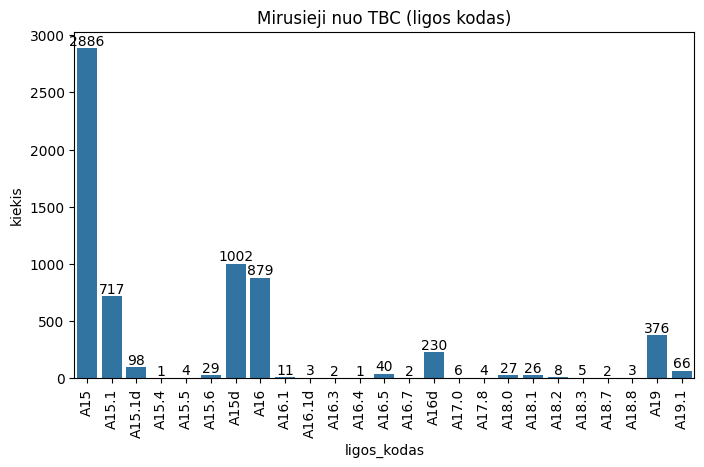

In [69]:
# kodas = tubmir.groupby(['amz_grupe', 'ligos_kodas'])['paciento_id'].count().reset_index(name='kiekis')
kodas = tubmir.groupby(['ligos_kodas'])['paciento_id'].count().reset_index(name='kiekis')
kodas
fig, ax1 = plt.subplots(figsize=[8, 4.5])
sns.barplot(data=kodas, y='kiekis', x='ligos_kodas', ax=ax1)
ax1.set_title('Mirusieji nuo TBC (ligos kodas)')
ax1.tick_params(axis='x', rotation=90)
# plt.tight_layout()
for i in ax1.containers:
    ax1.bar_label(i)
plt.show()

In [81]:
# bandymas sukurti  sergančiųjų amžiaus modelį
tubdf = pd.read_csv('../../../eismas/TubPacientoZalingasIprotis.csv')
# susitvarkom laikus


In [82]:
tubdf.columns

Index(['_type', '_id', '_revision', '_page.next', 'paciento_id',
       'paciento_vardas', 'paciento_pavarde', 'paciento_gim_data',
       'paciento_asmens_kodas', 'vda_ak_validacija',
       'vda_paciento_gim_metai_ak', 'paciento_gim_metai',
       'vda_paciento_lytis_ak', 'paciento_lytis', 'rukymas_id',
       'rukymas_reiksme', 'rukymo_stazas_id', 'rukymo_stazas_reiksme',
       'alkoholis_id', 'alkoholis_reiksme', 'vda_ligos_kodai', 'ligos_kodas',
       'ar_mire_nuo_tub', 'mirties_nuo_tub_d'],
      dtype='object')

In [94]:
# current_year = datetime.now().year

def set_gime(x):
    if x is not np.nan:
        return int(x[:4])
tubdf['gime'] = tubdf['paciento_gim_metai'].apply(set_gime)

def set_mire(x):
    if x is not np.nan:
        return int(x[:4])
    
tubdf['mire'] = tubdf['mirties_nuo_tub_d'].apply(set_mire)

# x = '1978-01-01'
# print(set_gime(x))

In [96]:
def tiketinas_amzius(row):
    current_year = datetime.now().year
    if pd.notnull(row['mire']):
        return row['mire'] - row['gime']
    else:
        return current_year - row['gime']
    
tubdf['tiketinas_amzius'] = tubdf.apply(tiketinas_amzius, axis=1)


In [98]:
# 1 - mirė nuo TBC
# 0 - laikome kad vis dar gyvas
tubdf['mire_nuo_tbc'] = tubdf['mire'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [107]:
c = np.sort(tubdf['tiketinas_amzius'].unique())
c


array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124.,  nan])